In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.optimize import fsolve
import scienceplots
plt.style.use(['science','notebook','grid'])
import pandas as pd

In [46]:
Av = 15.71511 #MeV
As = 17.53638 #MeV
Ac = 0.71363 #MeV
Aa = 23.37837 #MeV
Cl = 0.0034
dm = 1.293 #MeV (939.565-938.272)

In [18]:
def y(x):
    return np.sqrt(As/(2*Ac*x*x*x))

In [4]:
def f(x):
    return 0.5/(1 + Ac*x*x/(4*Aa)) - np.sqrt(As/(2*Ac*x*x*x))

In [17]:
sol = root(f,3)
xstable = sol['x'][0]
ystable = y(xstable)

In [34]:
Astable = xstable**3
Zstable = ystable*Astable
(Zstable,Astable)

(27.496349566027305, 61.53372802754275)

In [36]:
print(f'The most stable element is the one with Z = {int(Zstable)} and A = {int(Astable)}.')

The most stable element is the one with Z = 27 and A = 61.


In [74]:
def g(S,pF, Cl=Cl):
    x,y = S
    eq1 = - As/x**2 + 2*(Ac - Cl*pF)*x*y*y
    eq2 = -dm + 2*(Ac - Cl*pF)*x*x*y - 4*Aa*(1-2*y) + np.cbrt(y)*pF
    return [eq1,eq2]

In [75]:
pf_values = np.linspace(0.1,35,100)

In [76]:
res = []
for pf in pf_values:
    x,y = fsolve(g,(5,5),args=(pf))
    n = pf**3/(3*np.pi**2)
    res.append({'pF': pf, 'n': n, 'x': x, 'y': y})
df = pd.DataFrame(res)

In [81]:
resCl0 = []
for pf in pf_values:
    x,y = fsolve(g,(5,5),args=(pf,0))
    n = pf**3/(3*np.pi**2)
    resCl0.append({'pF': pf, 'n': n, 'x': x, 'y': y})
dfCl0 = pd.DataFrame(resCl0)

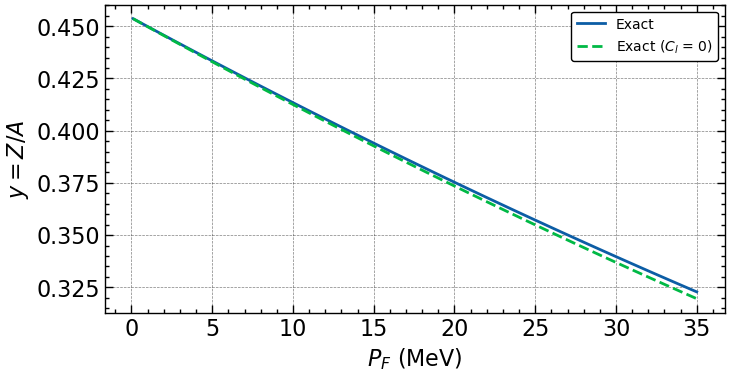

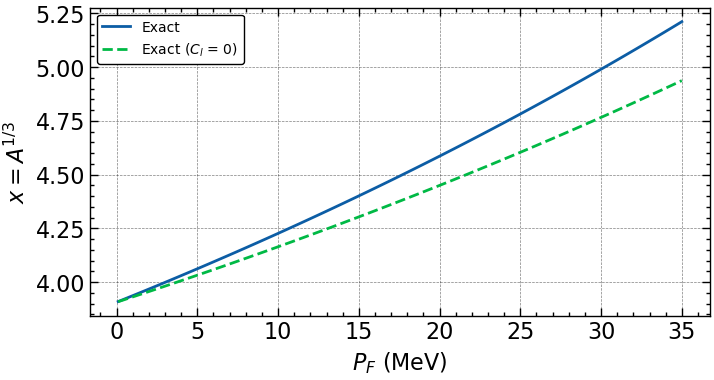

In [106]:
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(pf_values,df['y'], label='Exact')
plt.plot(pf_values,dfCl0['y'],linestyle='--', label='Exact ($C_l$ = 0)')
plt.xlabel('$P_F$ (MeV)')
plt.ylabel('$y = Z/A$')
plt.legend(frameon=True, edgecolor='black', fontsize=10)
plt.show()
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(pf_values,df['x'],label='Exact')
plt.plot(pf_values,dfCl0['x'],linestyle='--',label='Exact ($C_l$ = 0)')
plt.xlabel('$P_F$ (MeV)')
plt.ylabel('$x = A^{1/3}$')
plt.legend(frameon=True, edgecolor='black', fontsize=10)
plt.show()